In [35]:
import eda_utils
import importlib
importlib.reload(eda_utils)
import warnings
import pandas as pd
warnings.simplefilter("ignore", pd.errors.PerformanceWarning)

#einlesen und mergen der Rohdaten
filepaths = [
    "./data/dwd_icon_eu_demand_20200920_20231027.nc",
    "./data/dwd_icon_eu_demand_20231027_20240108.nc",
    "./data/dwd_icon_eu_demand_20240108_20240129.nc",
    "./data/dwd_icon_eu_demand_20240129_20240519.nc"
]

dwd_demand_geo = eda_utils.combine_files(filepaths, agg="coordinates")

file_paths = [
    "./data/ncep_gfs_demand_20200920_20231027.nc",
    "./data/ncep_gfs_demand_20231027_20240108.nc",
    "./data/ncep_gfs_demand_20240108_20240129.nc",
    "./data/ncep_gfs_demand_20240129_20240519.nc"
]

ncep_demand_geo = eda_utils.combine_files(file_paths, agg="coordinates")
ncep_demand_geo = ncep_demand_geo[ncep_demand_geo.longitude < 180]

filepaths = [
    "./data/dwd_icon_eu_hornsea_1_20200920_20231027.nc",
    "./data/dwd_icon_eu_hornsea_1_20231027_20240108.nc",
    "./data/dwd_icon_eu_hornsea_1_20240108_20240129.nc",
    "./data/dwd_icon_eu_hornsea_1_20240129_20240519.nc"
]

dwd_hornsea_geo = eda_utils.combine_files(filepaths, agg='coordinates')

file_paths = [
    "./data/ncep_gfs_hornsea_1_20200920_20231027.nc",
    "./data/ncep_gfs_hornsea_1_20231027_20240108.nc",
    "./data/ncep_gfs_hornsea_1_20240108_20240129.nc",
    "./data/ncep_gfs_hornsea_1_20240129_20240519.nc"
]

ncep_hornsea_geo = eda_utils.combine_files(file_paths, agg='coordinates')

filepaths = [
    "./data/dwd_icon_eu_pes10_20200920_20231027.nc",
    "./data/dwd_icon_eu_pes10_20231027_20240108.nc",
    "./data/dwd_icon_eu_pes10_20240108_20240129.nc",
    "./data/dwd_icon_eu_pes10_20240129_20240519.nc"
]

dwd_pes10_geo = eda_utils.combine_files(filepaths, agg='coordinates')

file_paths = [
    "./data/ncep_gfs_pes10_20200920_20231027.nc",
    "./data/ncep_gfs_pes10_20231027_20240108.nc",
    "./data/ncep_gfs_pes10_20240108_20240129.nc",
    "./data/ncep_gfs_pes10_20240129_20240519.nc"
]

ncep_pes10_geo = eda_utils.combine_files(file_paths, agg='coordinates')
ncep_pes10_geo = ncep_pes10_geo[ncep_pes10_geo.longitude < 180]

#gruppiert nur nach koordinaten
dwd_demand_only_coordinates = dwd_demand_geo.groupby(["longitude", "latitude"], as_index=False).mean()
ncep_demand_only_coordinates = ncep_demand_geo.groupby(["longitude", "latitude"], as_index=False).mean()
dwd_hornsea_only_coordinates = dwd_hornsea_geo.groupby(["longitude", "latitude"], as_index=False).mean()
ncep_hornsea_only_coordinates = ncep_hornsea_geo.groupby(["longitude", "latitude"], as_index=False).mean()
dwd_pes10_only_coordinates = dwd_pes10_geo.groupby(["longitude", "latitude"], as_index=False).mean()
ncep_pes10_only_coordinates = ncep_pes10_geo.groupby(["longitude", "latitude"], as_index=False).mean()

In [36]:
#einlesen der rohdaten gruppiert nach valid time

filepaths = [
    "./data/dwd_icon_eu_hornsea_1_20200920_20231027.nc",
    "./data/dwd_icon_eu_hornsea_1_20231027_20240108.nc",
    "./data/dwd_icon_eu_hornsea_1_20240108_20240129.nc",
    "./data/dwd_icon_eu_hornsea_1_20240129_20240519.nc"
]

df_icon_eu_hornsea_full_agg = eda_utils.combine_files(filepaths, agg='time')

filepaths = [
    "./data/dwd_icon_eu_pes10_20200920_20231027.nc",
    "./data/dwd_icon_eu_pes10_20231027_20240108.nc",
    "./data/dwd_icon_eu_pes10_20240108_20240129.nc",
    "./data/dwd_icon_eu_pes10_20240129_20240519.nc"
]

df_icon_eu_pes10_full_agg = eda_utils.combine_files(filepaths, agg='time')

file_paths = [
    "./data/ncep_gfs_hornsea_1_20200920_20231027.nc",
    "./data/ncep_gfs_hornsea_1_20231027_20240108.nc",
    "./data/ncep_gfs_hornsea_1_20240108_20240129.nc",
    "./data/ncep_gfs_hornsea_1_20240129_20240519.nc"
]

# Aufrufen der automatisierten Funktion
df_gfs_hornsea_full_agg = eda_utils.combine_files(file_paths, agg='time')

file_paths = [
    "./data/ncep_gfs_pes10_20200920_20231027.nc",
    "./data/ncep_gfs_pes10_20231027_20240108.nc",
    "./data/ncep_gfs_pes10_20240108_20240129.nc",
    "./data/ncep_gfs_pes10_20240129_20240519.nc"
]

# Aufrufen der automatisierten Funktion
df_gfs_pes10_full_agg = eda_utils.combine_files(file_paths, agg='time')

### __Verteilungen der Wetterdaten__

- da wir zwei verschiedene Wettervorhersagen gegeben haben, muss geklärt werden, wie diese am besten verarbeitet werden. In den beiden unteren Plots sind die normalisierten Verteilungen beider Vorhersagen übereinander abgebildet. Da diese sich größtenteils überschneiden, haben wir uns dazu entschieden, die beiden Vorhersagen über den Durchschnitt miteinander zu kombinieren. Durch diese Methode erhoffen wir uns, die Informationen beider Vorhersagen zu vereinen und so ein präziseres Ergebnis zu erzielen

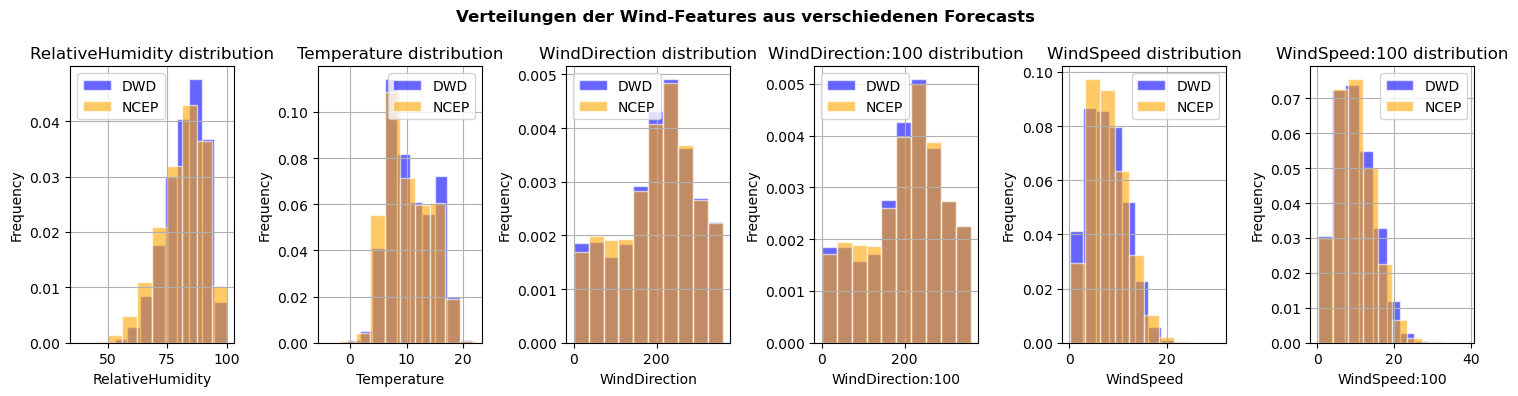

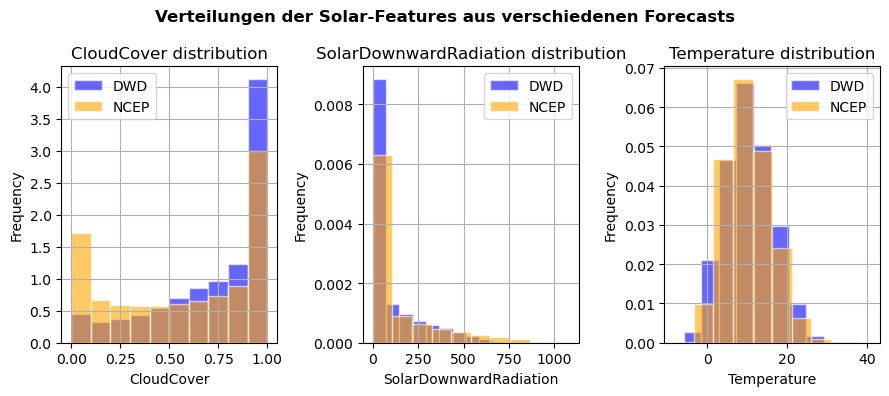

In [37]:
import importlib
importlib.reload(eda_utils)

dfs_hornsea = [df_icon_eu_hornsea_full_agg, df_gfs_hornsea_full_agg]
dfs_pes10 = [df_icon_eu_pes10_full_agg, df_gfs_pes10_full_agg]
names = ["DWD", "NCEP"]
eda_utils.combine_histograms(dfs_hornsea, names, figsize=(15, 4), title="Verteilungen der Wind-Features aus verschiedenen Forecasts")
eda_utils.combine_histograms(dfs_pes10, names, figsize=(9,4), title="Verteilungen der Solar-Features aus verschiedenen Forecasts")



### __Geografische Lage der Vorhersagen__

In [38]:
importlib.reload(eda_utils)

eda_utils.plot_stations_on_map([dwd_demand_only_coordinates, ncep_demand_only_coordinates, dwd_hornsea_only_coordinates, ncep_hornsea_only_coordinates, dwd_pes10_only_coordinates, ncep_pes10_only_coordinates], ['dwd_demand', 'ncep_demand', 'dwd_hornsea', 'ncep_hornsea', 'dwd_pes10', 'ncep_pes10_geo'])

### __Wetterdaten: Wind__

- abgebildet ist eine Wind Rose. Wind Rosen werden verwendet um aufzuzeigen, wie oft Wind aus einer bestimmten Richtung weht und mit welcher Geschwindigkeit. Dabei sieht man, dass der Wind vor allem aus Süd-Westen weht und die Windgeschwindigkeiten meist zwischen 3 und 12 m/s betragen

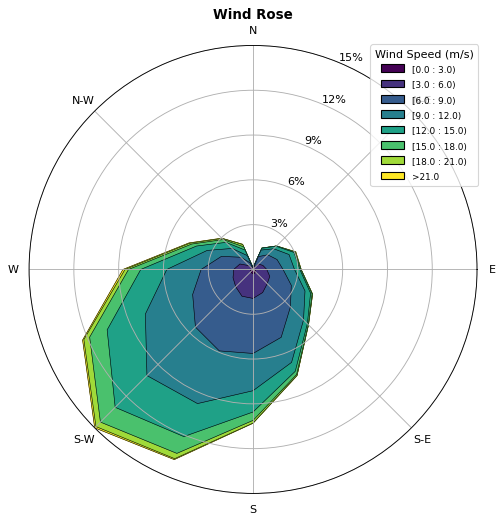

In [39]:
importlib.reload(eda_utils)
eda_utils.plot_wind_rose(ncep_hornsea_geo, title="Wind Rose")



### __Einfluss der Lage im Grid auf die Windgeschwindigkeit__

- Eine einfache Methode zur Reduzierung der Datenmenge besteht darin, die geografische Komponente zu vernachlässigen. Dafür muss zuvor ausgeschlossen werden, dass die Lage der Vorhersagen einfluss nimmt auf das Ergebnis. Zur Analyse wurden die Wind Rosen der äußersten Koordinaten und der zentralen Koordinate betrachtet. Da keine signifikanten Unterschiede festgestellt wurden, nehmen wir an, dass die Lage keinen Einfluss hat.

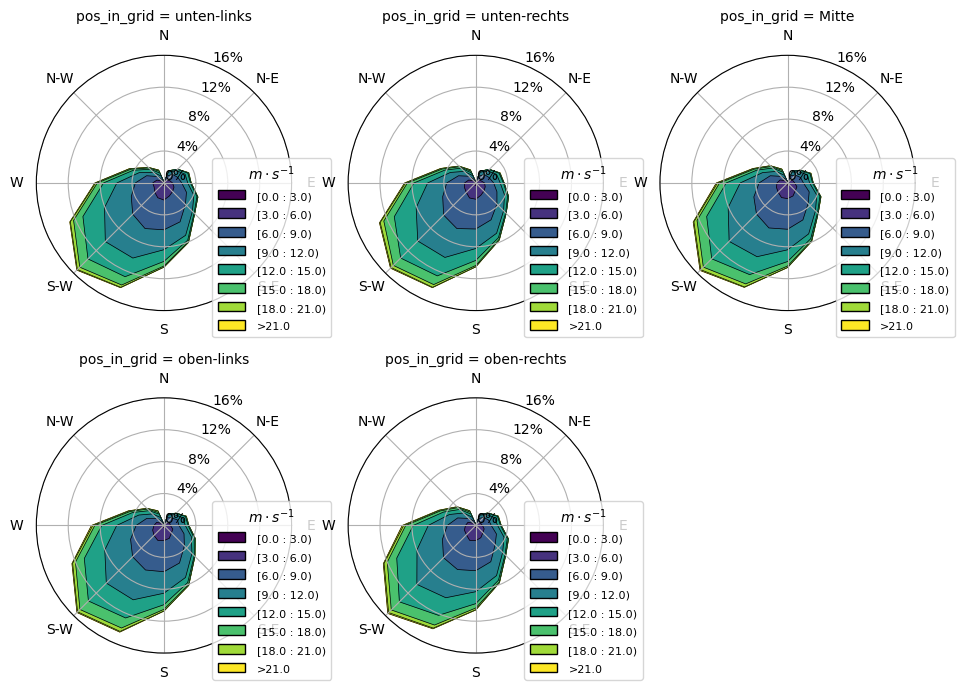

In [40]:
from windrose import WindroseAxes, plot_windrose
import math
import matplotlib.colors as colors
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
warnings.simplefilter("ignore", UserWarning)
import seaborn as sns
import matplotlib.ticker as mtick

ncep_hornsea_geo['lat_lon_combination'] = ncep_hornsea_geo['latitude'].astype(str) + '_' + ncep_hornsea_geo['longitude'].astype(str)
corner_pos = ["53.59_1.522", "53.59_2.022", "54.09_2.022", "54.09_1.522", "53.84_1.772"]
plot_df = ncep_hornsea_geo[["latitude","longitude", "valid_time", "WindSpeed:100","WindDirection:100", "lat_lon_combination"]]

plot_df = plot_df[plot_df.lat_lon_combination.isin(corner_pos)]

coordinate_names = {
    "53.59_1.522": "unten-links",
    "53.59_2.022": "unten-rechts",
    "54.09_2.022": "oben-rechts",
    "54.09_1.522": "oben-links",
    "53.84_1.772": "Mitte"
}
plot_df['pos_in_grid'] = plot_df['lat_lon_combination'].map(coordinate_names)


def plot_windrose_subplots(data, *, direction, var, color=None, **kwargs):
    """wrapper function to create subplots per axis"""
    ax = plt.gca()
    ax = WindroseAxes.from_ax(ax=ax)
    plot_windrose(direction_or_df=data[direction]["mean"], var=data[var]["mean"], ax=ax,  **kwargs)


g = sns.FacetGrid(
    data=plot_df,
    col="pos_in_grid", #col name
    col_wrap=3,
    subplot_kws={"projection": "windrose"},
    sharex=False,
    sharey=False,
    despine=False,
    height=3.5,
)

ws = plot_df['WindSpeed:100']["mean"].to_numpy()
std = np.nanstd(ws)
u = np.nanmean(ws)
width = 3

maxVal = round(u+4*std)
num = math.ceil((maxVal)/width)
maxVal = width*num
if maxVal > 24:
    maxVal = 24

    # Form bin ranges

windRange = np.arange(0, maxVal , width)

g.map_dataframe(
    plot_windrose_subplots,
    direction="WindDirection:100",
    var="WindSpeed:100",
    normed=True,
    bins=windRange,
    linewidth=0.5, 
    kind="contourf",
    cmap=cm.viridis
)

g.map_dataframe(
    plot_windrose_subplots,
    direction="WindDirection:100",
    var="WindSpeed:100",
    normed=True,
    bins=windRange,
    linewidth=0.5, 
    colors="black",
    kind="contour",
)

# make the subplots easier to compare, by having the same y-axis range
y_ticks = range(0, 17, 4)
for ax in g.axes:
    ax.set_legend(
        title=r"$m \cdot s^{-1}$", bbox_to_anchor=(1.15, -0.1), loc="lower right"
    )
    ax.set_rgrids(y_ticks, y_ticks)
    fmt = '%.0f%%' 
    yticks = mtick.FormatStrFormatter(fmt)
    ax.yaxis.set_major_formatter(yticks)

# adjust the spacing between the subplots to have sufficient space between plots
plt.subplots_adjust(wspace=-0.2)

### __Einfluss der Wetter Daten auf die Energie Produktion__

Windenergie:
- vor allem starke Korrelation mit Windgeschwindigkeit

Solarenergie:
- starke Korrelation mit  Solarstrahlung / schwächere, aber noch immer signifikante Korrelation mit Temperatur

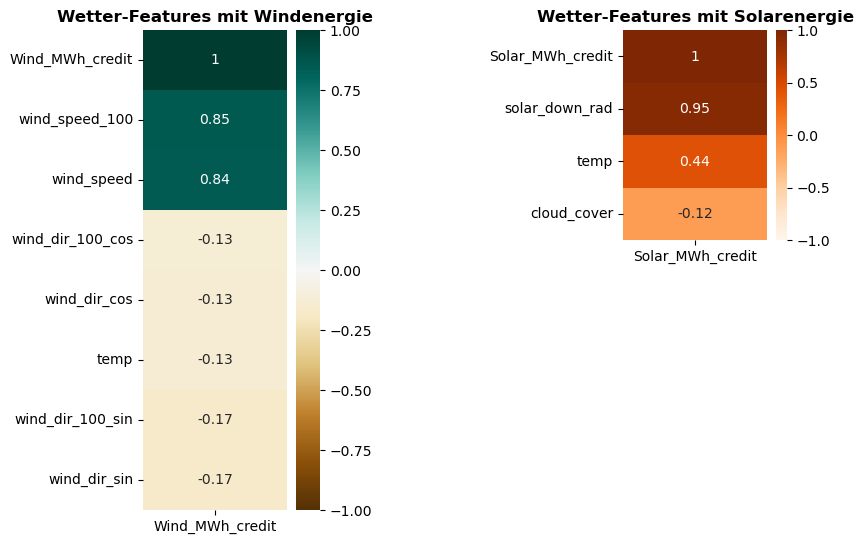

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#heatmaps for solar and wind energy
merged_hornsea = pd.read_parquet("Data/preprocessed_hornsea_with_energy.parquet")
merged_hornsea_weather = merged_hornsea[["temp", "wind_speed", "wind_speed_100", "wind_dir_sin", "wind_dir_cos", "wind_dir_100_sin", "wind_dir_100_cos", "Wind_MWh_credit"]]

merged_pes = pd.read_parquet("Data/preprocessed_pes_with_energy.parquet")
merged_pes_weather = merged_pes[["cloud_cover", "solar_down_rad", "temp", "Solar_MWh_credit"]]

fig = plt.figure(figsize=(12, 6))  

ax1 = fig.add_axes([0.1, 0.1, 0.15, 0.8])  # [left, bottom, width, height]
sns.heatmap(merged_hornsea_weather.corr()[['Wind_MWh_credit']].sort_values(by='Wind_MWh_credit', ascending=False),
            vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax1)
ax1.set_title('Wetter-Features mit Windenergie', fontweight="bold")

ax2 = fig.add_axes([0.5, 0.55, 0.15, 0.35])  # [left, bottom, width, height]
sns.heatmap(merged_pes_weather.corr()[["Solar_MWh_credit"]].sort_values(by="Solar_MWh_credit", ascending=False),
            vmin=-1, vmax=1, annot=True, cmap="Oranges", ax=ax2)
ax2.set_title('Wetter-Features mit Solarenergie', fontweight="bold")

# Layout anpassen
plt.tight_layout()
plt.show()



### __Korrelationsmatrix Windenergie__

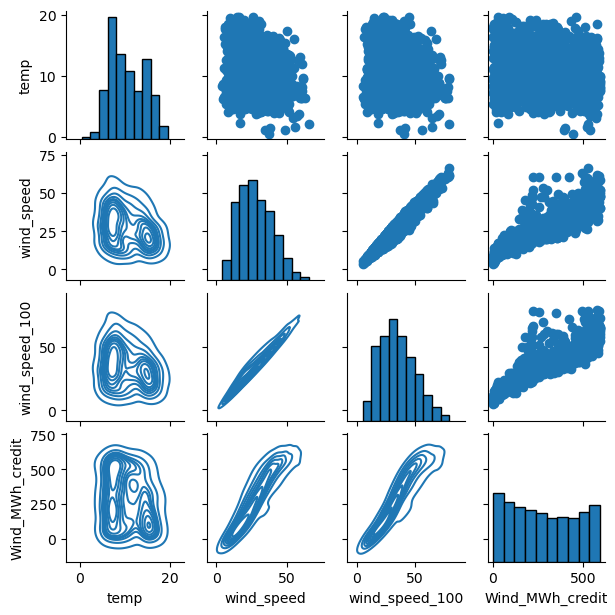

In [42]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
warnings.simplefilter("ignore", FutureWarning)

merged_hornsea_simple = merged_hornsea[["temp", "wind_speed", "wind_speed_100", "wind_speed_altitude_diff", 'Wind_MWh_credit']]
merged_hornsea_simple = merged_hornsea_simple.resample("D").mean()

def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    
# Create a pair grid instance
grid = sns.PairGrid(data= merged_hornsea_simple,
                    vars = ["temp", "wind_speed", "wind_speed_100", 'Wind_MWh_credit'])

# Map the plots to the locations
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k')

grid.fig.set_size_inches(6, 6)

### __Korrelationsmatrix Solarenergie__

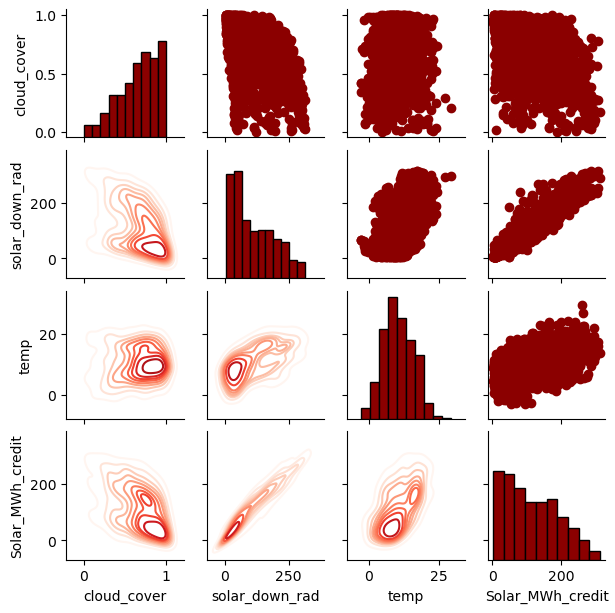

In [43]:
merged_pes_simple = merged_pes[['cloud_cover', 'solar_down_rad', 'temp', 'Solar_MWh_credit']]
merged_pes_simple = merged_pes_simple.resample("D").mean()

grid = sns.PairGrid(data= merged_pes_simple)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color="darkred")
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap="Reds")
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color="darkred")

grid.fig.set_size_inches(6, 6)

### __Windenergie und Wetterfeatures Time Series__

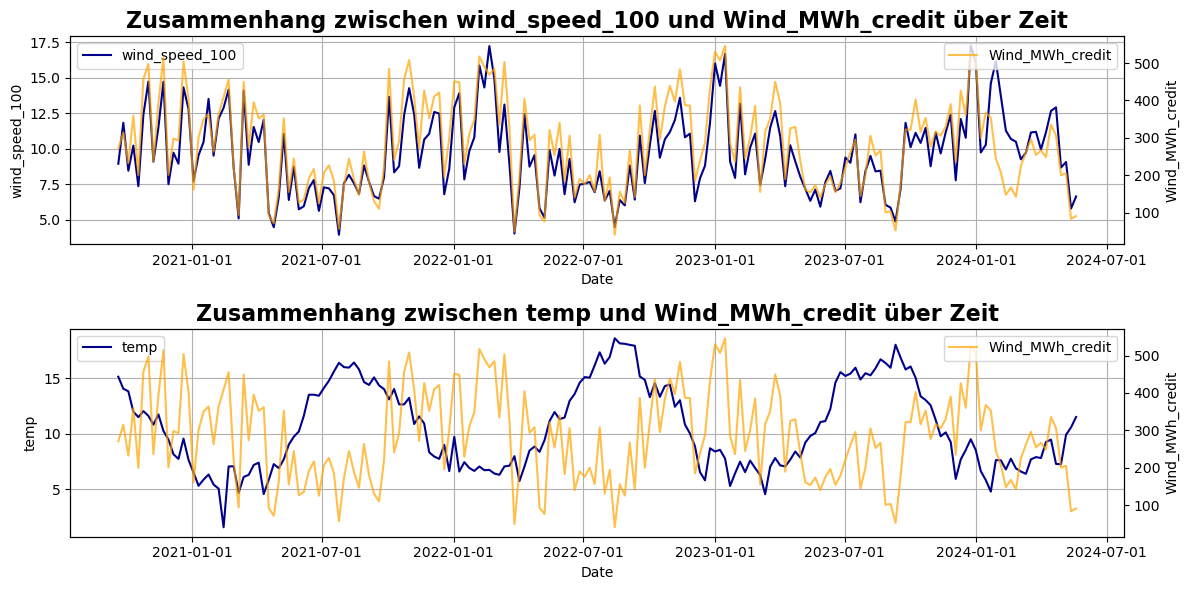

In [44]:
from datetime import date
importlib.reload(eda_utils)

merged_hornsea = pd.read_parquet("Data/preprocessed_hornsea_with_energy.parquet")
merged_hornsea_simple = merged_hornsea[["wind_speed_100", "temp", 'Wind_MWh_credit']]
merged_hornsea_simple = merged_hornsea_simple.resample("W").mean()
merged_hornsea_simple["wind_speed_100"] = merged_hornsea_simple["wind_speed_100"] / 3.6

eda_utils.energy_vs_feature(plot=merged_hornsea_simple, energy= "Wind_MWh_credit", color="darkblue", figsize=(12, 6))

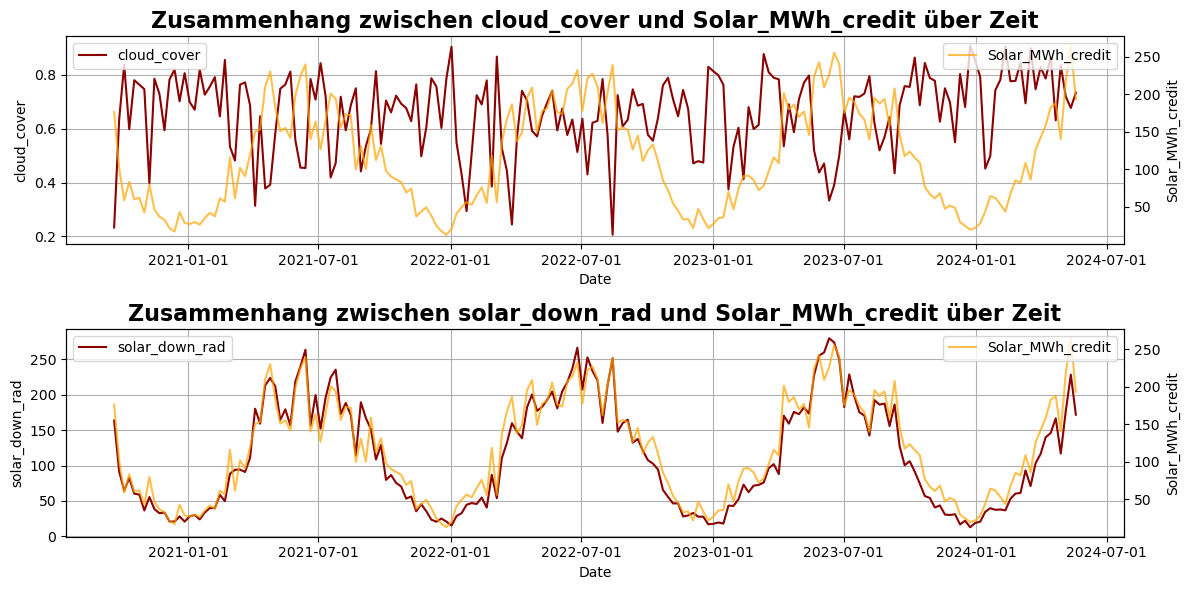

In [45]:
merged_pes = pd.read_parquet("Data/preprocessed_pes_with_energy.parquet")
merged_pes_simple = merged_pes[['cloud_cover', 'solar_down_rad', 'Solar_MWh_credit']]
merged_pes_simple = merged_pes_simple.resample("W").mean()

eda_utils.energy_vs_feature(plot=merged_pes_simple, energy= "Solar_MWh_credit", color="darkred", figsize=(12, 6))

C:\Users\maxda\AppData\Local\Temp\ipykernel_26824\1731580286.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\maxda\AppData\Local\Temp\ipykernel_26824\1731580286.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



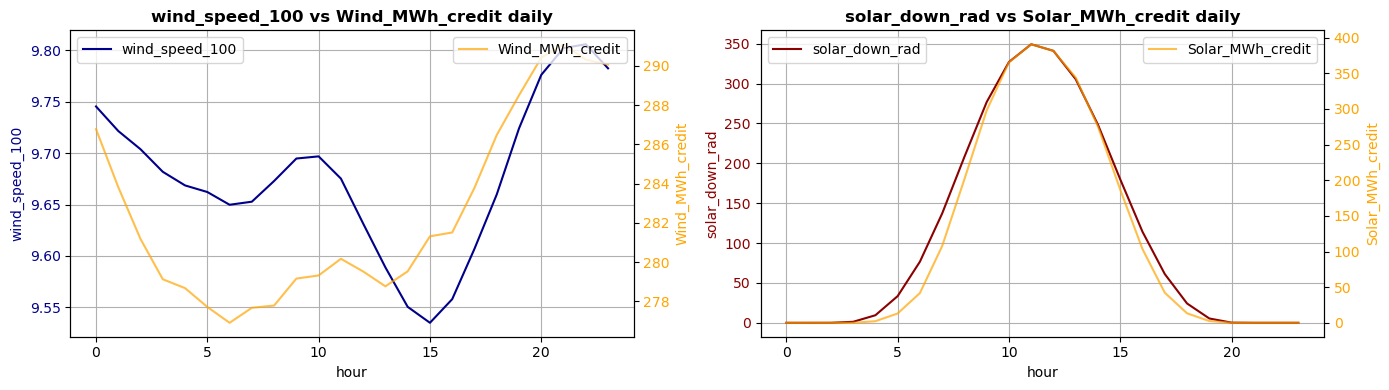

In [46]:
merged_hornsea_simple_hourly = merged_hornsea[["wind_speed_100", "Wind_MWh_credit"]]
merged_hornsea_simple_hourly["hour"] = merged_hornsea_simple_hourly.index.hour
merged_hornsea_simple_hourly = merged_hornsea_simple_hourly.groupby("hour").mean()
merged_hornsea_simple_hourly["wind_speed_100"] = merged_hornsea_simple_hourly["wind_speed_100"] / 3.6

merged_pes_simple_hourly = merged_pes[["solar_down_rad", "Solar_MWh_credit"]]
merged_pes_simple_hourly["hour"] = merged_pes_simple_hourly.index.hour
merged_pes_simple_hourly = merged_pes_simple_hourly.groupby("hour").mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

axes = axes.flatten()
axes2 = [None] * 2

# hornsea plot with wind energy
plot = merged_hornsea_simple_hourly
axes[0].plot(plot.index, plot["wind_speed_100"], "darkblue", label="wind_speed_100")
axes[0].set_xlabel('hour')
axes[0].set_ylabel("wind_speed_100", color="darkblue")
axes[0].tick_params(axis='y', labelcolor="darkblue")

axes2[0] = axes[0].twinx()
axes2[0].plot(plot.index, plot["Wind_MWh_credit"], 'orange', label="Wind_MWh_credit", alpha=0.7)
axes2[0].set_ylabel("Wind_MWh_credit", color='orange')
axes2[0].tick_params(axis='y', labelcolor='orange')
            


axes[0].grid(True)
axes[0].set_title(f'{"wind_speed_100"} vs {"Wind_MWh_credit"} daily', fontweight="bold")


axes[0].legend(loc='upper left')
axes2[0].legend(loc='upper right')

#pes plot with solar energy
plot = merged_pes_simple_hourly
axes[1].plot(plot.index, plot["solar_down_rad"], "darkred", label="solar_down_rad")
axes[1].set_xlabel('hour')
axes[1].set_ylabel("solar_down_rad", color="darkred")
axes[1].tick_params(axis='y', labelcolor="darkred")

axes2[1] = axes[1].twinx()
axes2[1].plot(plot.index, plot["Solar_MWh_credit"], 'orange', label="Solar_MWh_credit", alpha=0.7)
axes2[1].set_ylabel("Solar_MWh_credit", color='orange')
axes2[1].tick_params(axis='y', labelcolor='orange')
            

axes[1].grid(True)
axes[1].set_title(f'{"solar_down_rad"} vs {"Solar_MWh_credit"} daily', fontweight="bold")

axes[1].legend(loc='upper left')
axes2[1].legend(loc='upper right')    

plt.tight_layout()
plt.show()

### __Ausfäll bei der Produktion von Windenergie__

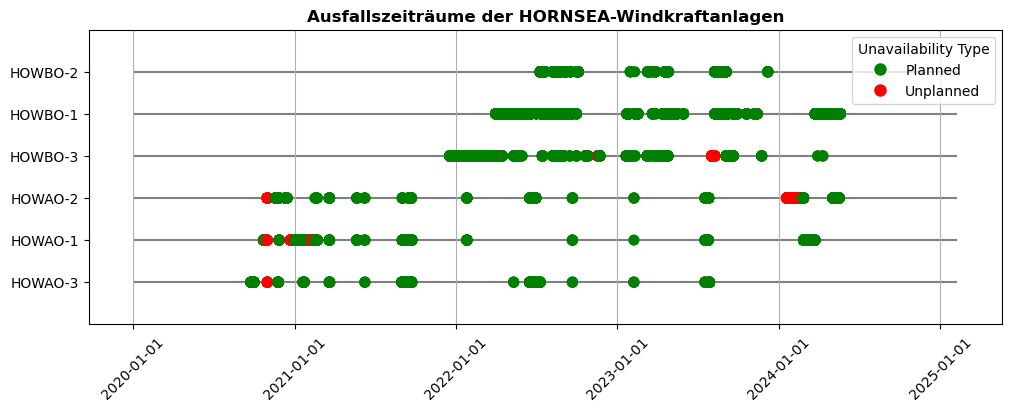

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates

merged_hornsea = pd.read_parquet("./Data/preprocessed_hornsea_with_energy.parquet")
outage_data = merged_hornsea[["unavailabilityType", "affectedUnit"]]
outage_data_cleaned = outage_data[outage_data.affectedUnit != "None"]
dates = outage_data_cleaned.index  

units = outage_data_cleaned['affectedUnit'].unique()
unit_mapping = {unit: idx for idx, unit in enumerate(units)}
y_values = outage_data_cleaned['affectedUnit'].map(unit_mapping)

# Farben für den Unavailability Type
color_mapping = {'Planned': 'green', 'Unplanned': 'red'} 
colors = outage_data_cleaned['unavailabilityType'].map(color_mapping)

# Bestimme den minimalen und maximalen Zeitraum und erweiter ihn etwas
min_date = dates.min() - pd.DateOffset(years=1)  # 1 Jahr vor dem ersten Event
max_date = dates.max() + pd.DateOffset(years=1)  # 1 Jahr nach dem letzten Event

# Scatter plot Setup
fig, ax = plt.subplots(figsize=(10, 4), constrained_layout=True)
ax.set_ylim(-1, len(units))  # -1, damit genug Platz für die Labels bleibt
ax.set_xlim(min_date, max_date)

# Mittellinie für jede Unit
for y in range(len(units)):
    ax.axhline(y, xmin=0.05, xmax=0.95, color='grey', zorder=1)

# Punkte plotten für jede unit
scatter = ax.scatter(dates, y_values, s=50, c=colors, zorder=2)

# Legende für die Farben hinzufügen
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) 
                 for label, color in color_mapping.items()]
ax.legend(handles=legend_labels, title="Unavailability Type")

# Y-Achse: Labels für die Einheiten setzen
ax.set_yticks(np.arange(len(units)))
ax.set_yticklabels(units)

# Setze das Format der x-Achse als Datumsformat
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

ax.set_title('Ausfallszeiträume der HORNSEA-Windkraftanlagen', fontweight="bold")
plt.grid(True, axis="x")
plt.show()


- im Zeitraum der verfügbaren Daten gibt es mehrere ungeplante Ausfälle. Im Januar 2024 tritt jedoch einen deutlich längerer ungeplanter Ausfall auf. Das zeigt sich auch daran, dass in diesem Zeitraum kein Zusammenhang mehr zwischen Windgeschwindigkeit und produzierter Energie erkennbar ist. Da es sich um Echzeitdaten handelt, müssen die Ausfälle beim Modelltraining berücksichtigt werden.

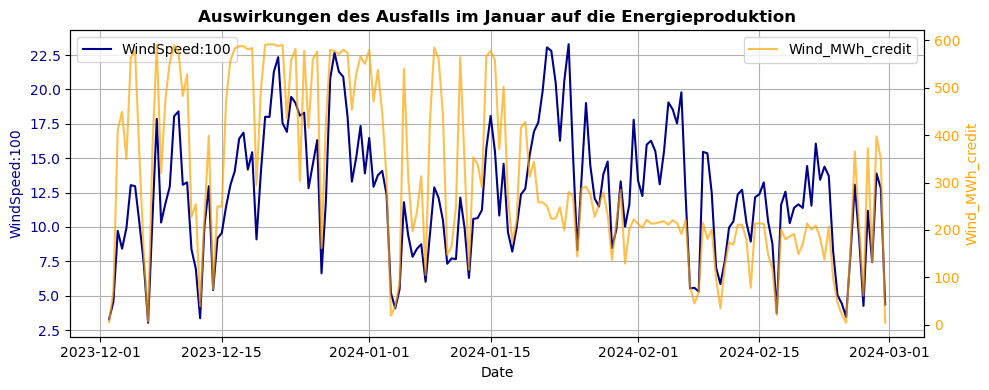

In [48]:
import matplotlib.pyplot as plt
from datetime import date


merged_hornsea = pd.read_parquet("./data/preprocessed_hornsea_with_energy.parquet")
merged_hornsea_simple = merged_hornsea[["wind_speed_100", 'Wind_MWh_credit']]
merged_hornsea_simple = merged_hornsea_simple.resample("12h").mean()
merged_hornsea_simple["wind_speed_100"] = merged_hornsea_simple["wind_speed_100"] / 3.6
start_date = date(2023, 12, 1)
end_date = date(2024, 3,  1)
plot = merged_hornsea_simple[(merged_hornsea_simple.index.date > start_date) & (merged_hornsea_simple.index.date < end_date)]

fig, ax1 = plt.subplots(figsize=(10, 4))
# Plot the feature on the primary y-axis
ax1.plot(plot.index, plot["wind_speed_100"], color="darkblue", label="WindSpeed:100")
ax1.set_xlabel('Date')
ax1.set_ylabel("WindSpeed:100", color="darkblue")
ax1.tick_params(axis='y', labelcolor="darkblue")

# Create a second y-axis (twinx) for the energy data
ax2 = ax1.twinx()
ax2.plot(plot.index, plot["Wind_MWh_credit"], 'orange', label="Wind_MWh_credit", alpha=0.7)
ax2.set_ylabel("Wind_MWh_credit", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set x-axis labels to display date in a readable format
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax1.grid(True)
ax1.set_title(f'Auswirkungen des Ausfalls im Januar auf die Energieproduktion', fontweight = 'bold')

# Add legends for both axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()